<Figure size 800x500 with 0 Axes>

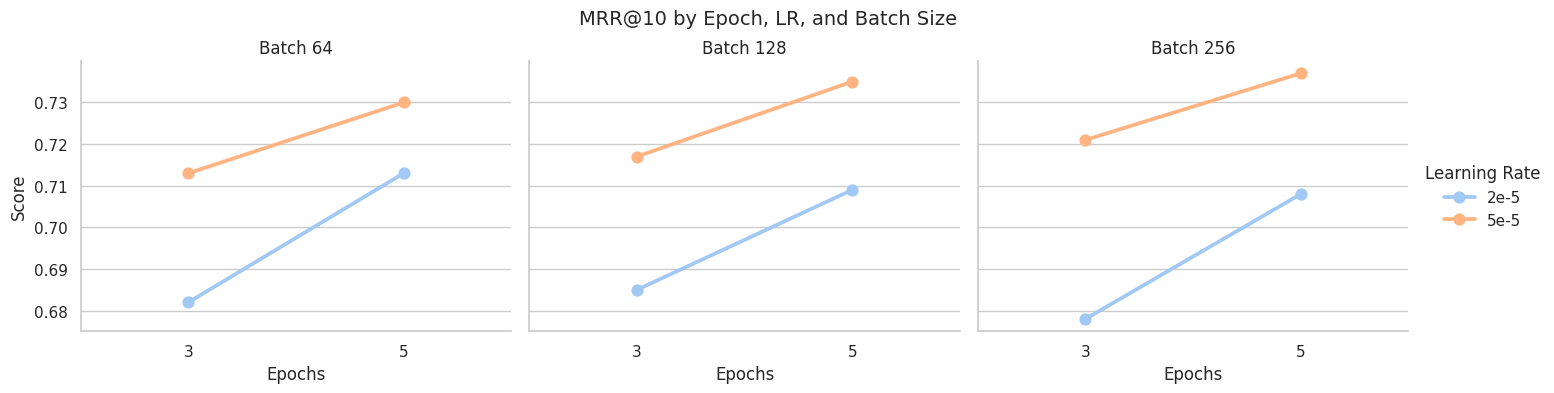

<Figure size 800x500 with 0 Axes>

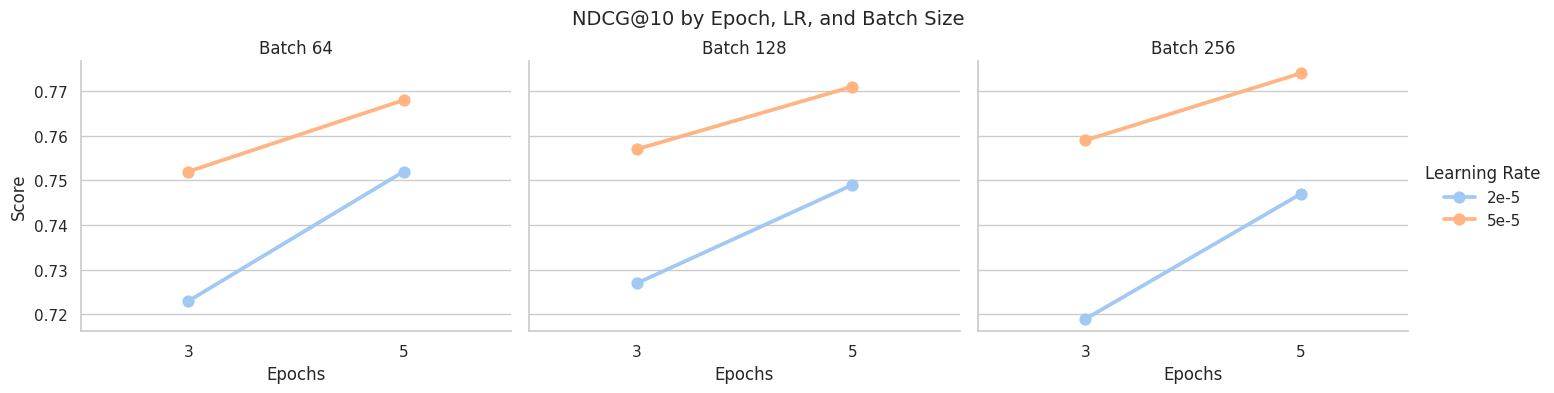

<Figure size 800x500 with 0 Axes>

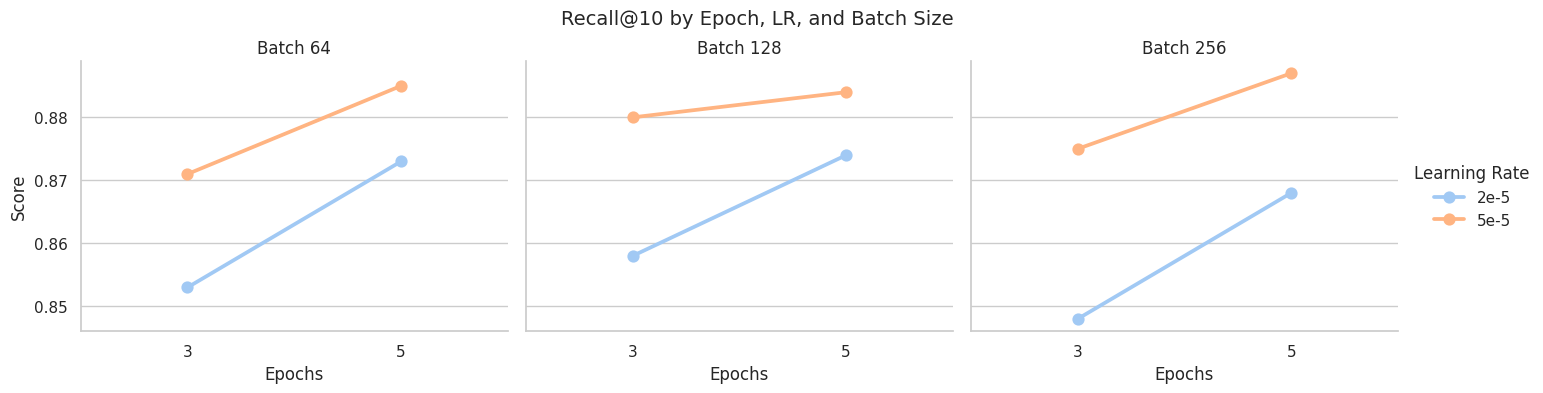

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Data
data = [
    ["2e-5", 64, 3, 0.682, 0.723, 0.853],
    ["2e-5", 64, 5, 0.713, 0.752, 0.873],
    ["2e-5", 128, 3, 0.685, 0.727, 0.858],
    ["2e-5", 128, 5, 0.709, 0.749, 0.874],
    ["2e-5", 256, 3, 0.678, 0.719, 0.848],
    ["2e-5", 256, 5, 0.708, 0.747, 0.868],
    ["5e-5", 64, 3, 0.713, 0.752, 0.871],
    ["5e-5", 64, 5, 0.730, 0.768, 0.885],
    ["5e-5", 128, 3, 0.717, 0.757, 0.880],
    ["5e-5", 128, 5, 0.735, 0.771, 0.884],
    ["5e-5", 256, 3, 0.721, 0.759, 0.875],
    ["5e-5", 256, 5, 0.737, 0.774, 0.887],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "Batch Size", "Epochs", "MRR@10", "NDCG@10", "Recall@10"])

# Melt for plotting
df_melted = df.melt(
    id_vars=["Learning Rate", "Batch Size", "Epochs"],
    value_vars=["MRR@10", "NDCG@10", "Recall@10"],
    var_name="Metric",
    value_name="Score"
)

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# Plot: Point Plot for each metric
metrics = ["MRR@10", "NDCG@10", "Recall@10"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    metric_data = df_melted[df_melted["Metric"] == metric]
    ax = sns.catplot(
        data=metric_data,
        x="Epochs",
        y="Score",
        hue="Learning Rate",
        col="Batch Size",
        kind="point",
        height=4,
        aspect=1.2,
        palette="pastel"
    )
    ax.set_titles(col_template="Batch {col_name}")
    ax.set_axis_labels("Epochs", "Score")
    ax.fig.subplots_adjust(top=0.85)
    ax.fig.suptitle(f"{metric} by Epoch, LR, and Batch Size", fontsize=14)
    ax.savefig(f"pointplot_{metric.lower().replace('@', '').replace('/', '_')}.pdf", format="pdf", dpi=300)
    plt.show()
    plt.close()

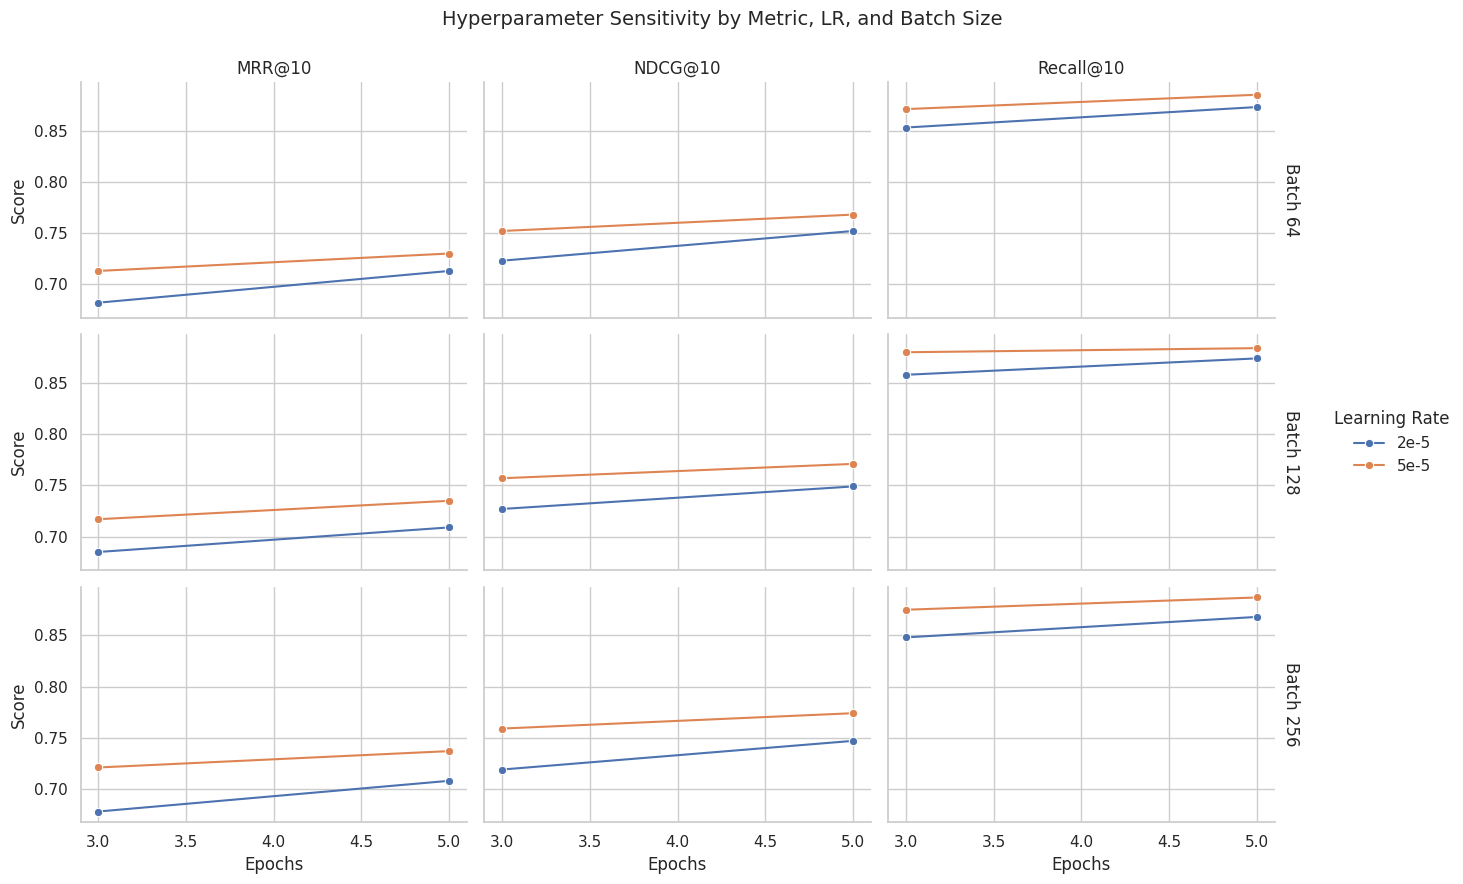

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = [
    ["2e-5", 64, 3, 0.682, 0.723, 0.853],
    ["2e-5", 64, 5, 0.713, 0.752, 0.873],
    ["2e-5", 128, 3, 0.685, 0.727, 0.858],
    ["2e-5", 128, 5, 0.709, 0.749, 0.874],
    ["2e-5", 256, 3, 0.678, 0.719, 0.848],
    ["2e-5", 256, 5, 0.708, 0.747, 0.868],
    ["5e-5", 64, 3, 0.713, 0.752, 0.871],
    ["5e-5", 64, 5, 0.730, 0.768, 0.885],
    ["5e-5", 128, 3, 0.717, 0.757, 0.880],
    ["5e-5", 128, 5, 0.735, 0.771, 0.884],
    ["5e-5", 256, 3, 0.721, 0.759, 0.875],
    ["5e-5", 256, 5, 0.737, 0.774, 0.887],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "Batch Size", "Epochs", "MRR@10", "NDCG@10", "Recall@10"])

# Melt the data for plotting
df_melted = df.melt(
    id_vars=["Learning Rate", "Batch Size", "Epochs"],
    value_vars=["MRR@10", "NDCG@10", "Recall@10"],
    var_name="Metric",
    value_name="Score"
)

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# 1. FacetGrid (Small Multiples)
g = sns.FacetGrid(
    df_melted,
    col="Metric",
    hue="Learning Rate",
    row="Batch Size",
    margin_titles=True,
    height=3,
    aspect=1.5
)
g.map(sns.lineplot, "Epochs", "Score", marker="o")
g.add_legend(title="Learning Rate")
g.set_titles(row_template='Batch {row_name}', col_template='{col_name}')
g.set_axis_labels("Epochs", "Score")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Hyperparameter Sensitivity by Metric, LR, and Batch Size", fontsize=14)
plt.savefig("facetgrid_hyperparam_sensitivity.pdf", format="pdf", dpi=300)
plt.show()
plt.close()



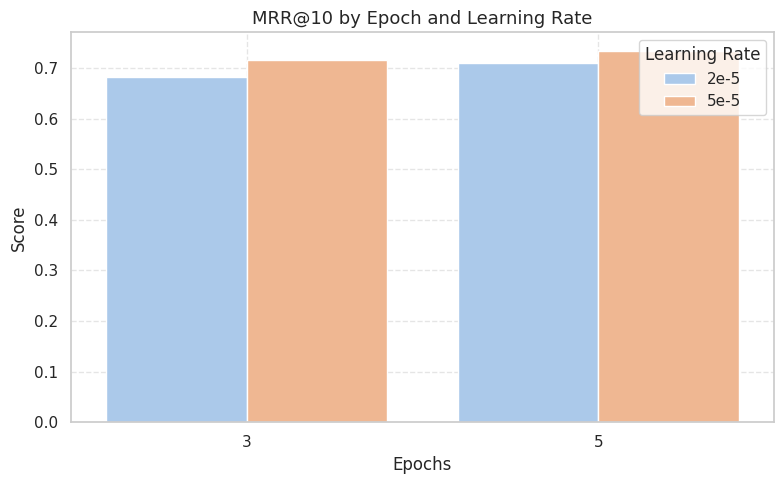

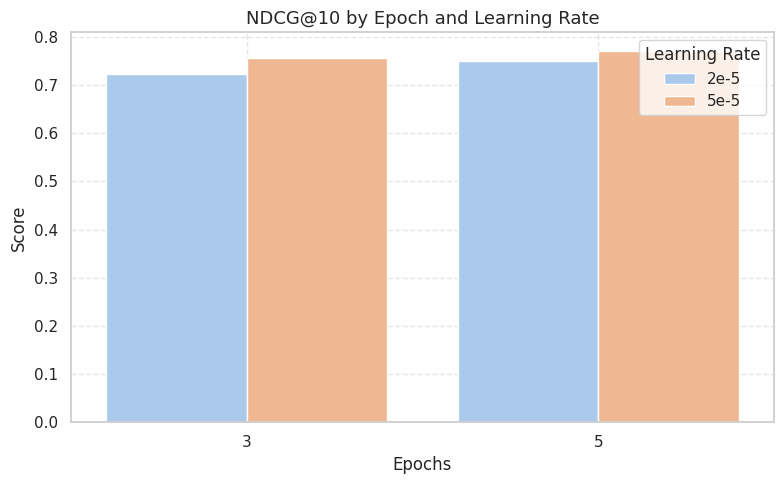

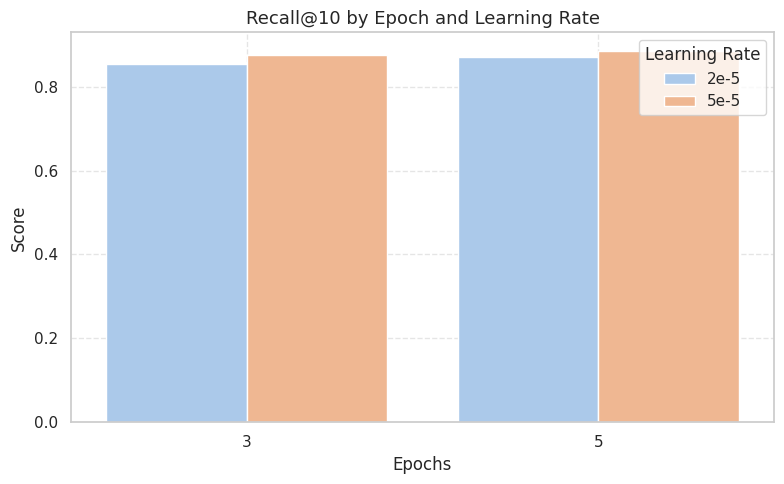

In [3]:
# 2. Grouped Bar Plot per Epoch (per metric)
metrics = ["MRR@10", "NDCG@10", "Recall@10"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    metric_data = df_melted[df_melted["Metric"] == metric]
    ax = sns.barplot(
        data=metric_data,
        x="Epochs",
        y="Score",
        hue="Learning Rate",
        ci=None,
        dodge=True,
        palette="pastel"
    )
    ax.set_title(f"{metric} by Epoch and Learning Rate", fontsize=13)
    ax.set_ylabel("Score")
    ax.set_xlabel("Epochs")
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.legend(title="Learning Rate")
    plt.tight_layout()
    plt.savefig(f"groupedbar_{metric.lower().replace('@', '').replace('/', '_')}.pdf", format="pdf", dpi=300)
    plt.show()
    plt.close()

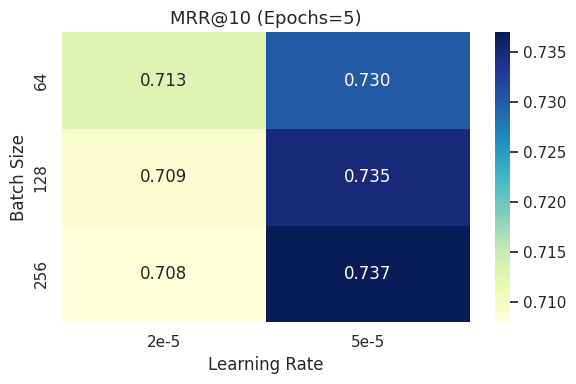

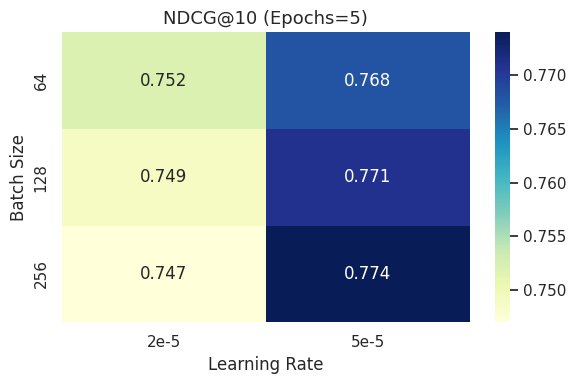

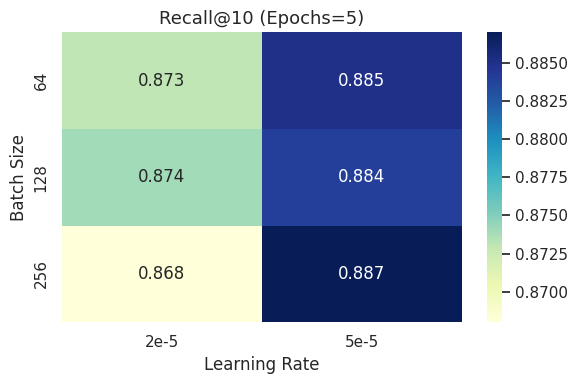

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = [
    ["2e-5", 64, 3, 0.682, 0.723, 0.853],
    ["2e-5", 64, 5, 0.713, 0.752, 0.873],
    ["2e-5", 128, 3, 0.685, 0.727, 0.858],
    ["2e-5", 128, 5, 0.709, 0.749, 0.874],
    ["2e-5", 256, 3, 0.678, 0.719, 0.848],
    ["2e-5", 256, 5, 0.708, 0.747, 0.868],
    ["5e-5", 64, 3, 0.713, 0.752, 0.871],
    ["5e-5", 64, 5, 0.730, 0.768, 0.885],
    ["5e-5", 128, 3, 0.717, 0.757, 0.880],
    ["5e-5", 128, 5, 0.735, 0.771, 0.884],
    ["5e-5", 256, 3, 0.721, 0.759, 0.875],
    ["5e-5", 256, 5, 0.737, 0.774, 0.887],
    ["6e-5", 256, 6, 0.744, 0.780, 0.894],
    ["8e-5", 256, 8, 0.756, 0.791, 0.900],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "Batch Size", "Epochs", "MRR@10", "NDCG@10", "Recall@10"])

# Filter for Epochs = 5
df_5ep = df[df["Epochs"] == 5]

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# Heatmap plots for each metric
metrics = ["MRR@10", "NDCG@10", "Recall@10"]

for metric in metrics:
    pivot = df_5ep.pivot(index="Batch Size", columns="Learning Rate", values=metric)
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu", cbar=True)
    plt.title(f"{metric} (Epochs=5)", fontsize=13)
    plt.xlabel("Learning Rate")
    plt.ylabel("Batch Size")
    plt.tight_layout()
    plt.savefig(f"heatmap_{metric.lower().replace('@', '').replace('/', '_')}.pdf", format="pdf", dpi=300)
    plt.show()
    plt.close()

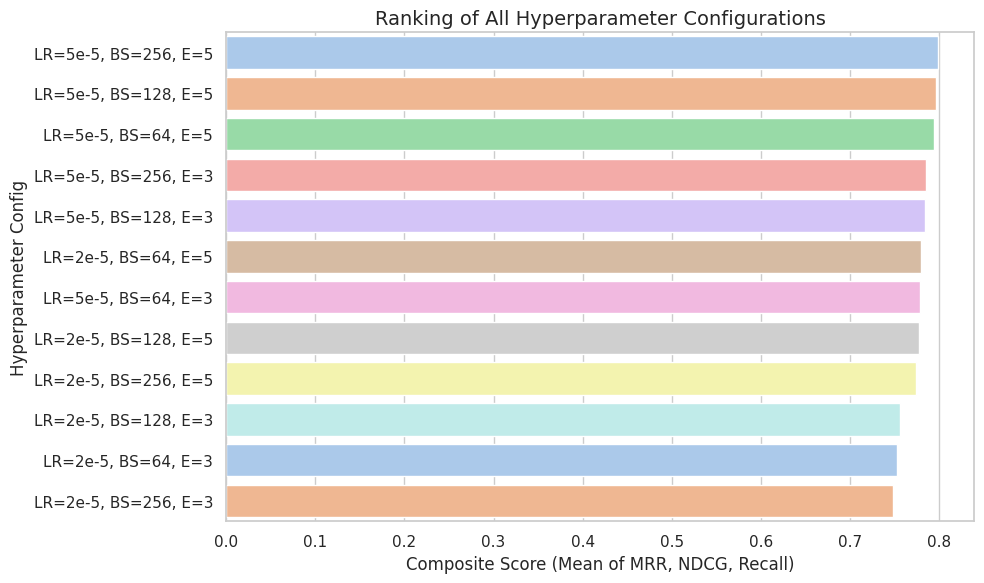

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = [
    ["2e-5", 64, 3, 0.682, 0.723, 0.853],
    ["2e-5", 64, 5, 0.713, 0.752, 0.873],
    ["2e-5", 128, 3, 0.685, 0.727, 0.858],
    ["2e-5", 128, 5, 0.709, 0.749, 0.874],
    ["2e-5", 256, 3, 0.678, 0.719, 0.848],
    ["2e-5", 256, 5, 0.708, 0.747, 0.868],
    ["5e-5", 64, 3, 0.713, 0.752, 0.871],
    ["5e-5", 64, 5, 0.730, 0.768, 0.885],
    ["5e-5", 128, 3, 0.717, 0.757, 0.880],
    ["5e-5", 128, 5, 0.735, 0.771, 0.884],
    ["5e-5", 256, 3, 0.721, 0.759, 0.875],
    ["5e-5", 256, 5, 0.737, 0.774, 0.887],
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "Batch Size", "Epochs", "MRR@10", "NDCG@10", "Recall@10"])

# Compute a composite score for ranking (you can adjust weights as needed)
df["Composite"] = df[["MRR@10", "NDCG@10", "Recall@10"]].mean(axis=1)

# Sort by composite score
df_sorted = df.sort_values("Composite", ascending=False)

# Build config label
df_sorted["Config"] = df_sorted.apply(lambda x: f"LR={x['Learning Rate']}, BS={x['Batch Size']}, E={x['Epochs']}", axis=1)

# Set font and style
plt.rcParams['font.family'] = 'Times New Roman'
sns.set(style="whitegrid")

# Bar plot of composite scores
plt.figure(figsize=(10, 6))
sns.barplot(x="Composite", y="Config", data=df_sorted, palette="pastel")
plt.xlabel("Composite Score (Mean of MRR, NDCG, Recall)", fontsize=12)
plt.ylabel("Hyperparameter Config", fontsize=12)
plt.title("Ranking of All Hyperparameter Configurations", fontsize=14)
plt.tight_layout()
plt.savefig("config_ranking_composite.pdf", format="pdf", dpi=300)
plt.show()
plt.close()

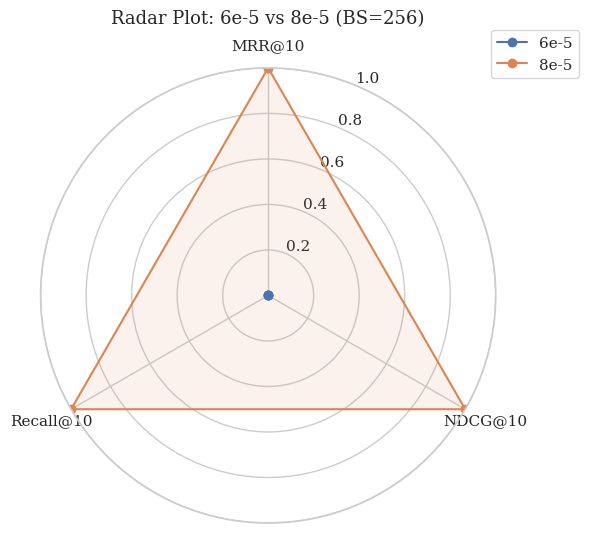

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np




# Final special-case data only for 6e-5 and 8e-5 (BS=256)
data = [
    ["6e-5", 0.744, 0.780, 0.894],
    ["8e-5", 0.756, 0.791, 0.900]
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "MRR@10", "NDCG@10", "Recall@10"])
df.set_index("Learning Rate", inplace=True)

# Normalize metrics to [0, 1] range per column for fair radar scaling
normalized_df = (df - df.min()) / (df.max() - df.min())

# Radar setup
labels = normalized_df.columns.tolist()
n_metrics = len(labels)
angles = np.linspace(0, 2 * np.pi, n_metrics, endpoint=False).tolist()
angles += angles[:1]  # complete loop

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
# ACL-style font config
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'DejaVu Serif'],
    'font.size': 11,
    'pdf.fonttype': 42
})
# Plot each learning rate
for index, row in normalized_df.iterrows():
    values = row.tolist()
    values += values[:1]  # complete loop
    ax.plot(angles, values, marker='o', label=index)
    ax.fill(angles, values, alpha=0.1)

# Formatting
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title("Radar Plot: 6e-5 vs 8e-5 (BS=256)", fontsize=13, y=1.08)
plt.tight_layout()
plt.savefig("radarplot_6e5_8e5_bs256.pdf", format="pdf", dpi=300)
plt.show()
plt.close()


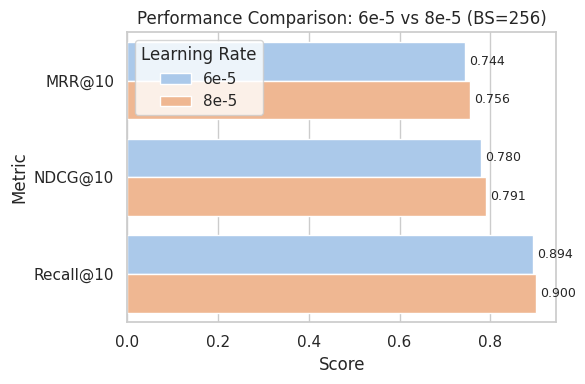

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ACL-style font config
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'DejaVu Serif'],
    'font.size': 11,
    'pdf.fonttype': 42
})

# Final special-case data only for 6e-5 and 8e-5 (BS=256)
data = [
    ["6e-5", 0.744, 0.780, 0.894],
    ["8e-5", 0.756, 0.791, 0.900]
]

# Create DataFrame
df = pd.DataFrame(data, columns=["Learning Rate", "MRR@10", "NDCG@10", "Recall@10"])

# Melt into long format for seaborn
df_melted = df.melt(id_vars="Learning Rate", var_name="Metric", value_name="Score")

# Plot grouped horizontal bar plot
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=df_melted,
    y="Metric",
    x="Score",
    hue="Learning Rate",
    palette="pastel"
)

# Annotate scores
for bar in ax.containers:
    ax.bar_label(bar, fmt="%.3f", fontsize=9, padding=3)

# Format plot
plt.xlabel("Score")
plt.ylabel("Metric")
plt.title("Performance Comparison: 6e-5 vs 8e-5 (BS=256)")
plt.tight_layout()
plt.savefig("barplot_6e5_8e5_bs256.pdf", format="pdf", dpi=300)
plt.show()
plt.close()


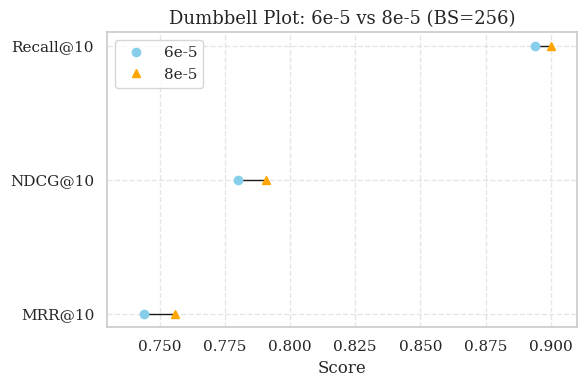

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ACL-style font config
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'DejaVu Serif'],
    'font.size': 11,
    'pdf.fonttype': 42
})

# Dumbbell plot data: 6e-5 vs 8e-5 (BS=256)
data = {
    "Metric": ["MRR@10", "NDCG@10", "Recall@10"],
    "6e-5": [0.744, 0.780, 0.894],
    "8e-5": [0.756, 0.791, 0.900]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))

# Draw horizontal lines between the two values per metric
for i in range(len(df)):
    ax.plot([df["6e-5"][i], df["8e-5"][i]], [i, i], 'k-', lw=1)
    ax.plot(df["6e-5"][i], i, 'o', color='skyblue', label='6e-5' if i == 0 else "")
    ax.plot(df["8e-5"][i], i, '^', color='orange', label='8e-5' if i == 0 else "")

# Formatting
ax.set_yticks(np.arange(len(df)))
ax.set_yticklabels(df["Metric"])
ax.set_xlabel("Score")
ax.set_xlim(0.73, 0.91)
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
plt.title("Dumbbell Plot: 6e-5 vs 8e-5 (BS=256)", fontsize=13)
plt.tight_layout()
plt.savefig("dumbbell_6e5_8e5_bs256.pdf", format="pdf", dpi=300)
plt.show()
plt.close()

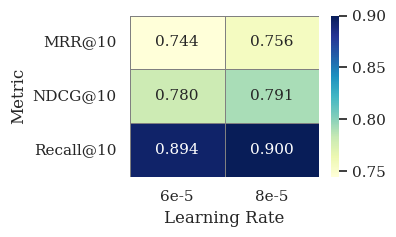

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ACL-style font config
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'DejaVu Serif'],
    'font.size': 11,
    'pdf.fonttype': 42
})

# Raw data: flattened format
data = {
    "Learning Rate": ["6e-5", "6e-5", "6e-5", "8e-5", "8e-5", "8e-5"],
    "Metric": ["MRR@10", "NDCG@10", "Recall@10"] * 2,
    "Score": [0.744, 0.780, 0.894, 0.756, 0.791, 0.900]
}

# Create DataFrame and pivot
df = pd.DataFrame(data)
df_pivot = df.pivot(index="Metric", columns="Learning Rate", values="Score")

# Plot heatmap
plt.figure(figsize=(4, 2.5))
sns.heatmap(df_pivot, annot=True, cmap="YlGnBu", fmt=".3f", cbar=True, linewidths=0.5, linecolor='gray')
# plt.title("Heatmap: Metric vs Learning Rate (BS=256)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("heatmap_metrics_lr_bs256.pdf", format="pdf", dpi=300)
plt.show()
plt.close()


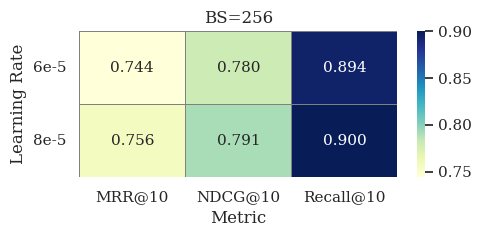

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ACL-style font config
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times', 'DejaVu Serif'],
    'font.size': 11,
    'pdf.fonttype': 42
})

# Raw data: flattened format
data = {
    "Learning Rate": ["6e-5", "6e-5", "6e-5", "8e-5", "8e-5", "8e-5"],
    "Metric": ["MRR@10", "NDCG@10", "Recall@10"] * 2,
    "Score": [0.744, 0.780, 0.894, 0.756, 0.791, 0.900]
}

# Create DataFrame and pivot to show learning rates as rows
df = pd.DataFrame(data)
df_pivot = df.pivot(index="Learning Rate", columns="Metric", values="Score")

# Plot heatmap
plt.figure(figsize=(5, 2.5))
sns.heatmap(df_pivot, annot=True, cmap="YlGnBu", fmt=".3f", cbar=True, linewidths=0.5, linecolor='gray')
plt.title("Batch size=256", fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("heatmap_lr_vs_metrics_bs256.pdf", format="pdf", dpi=300)
plt.show()
plt.close()
